##Part 1: CIFAR10 Classification

Follow along the tutorial for CIFAR10 classification found here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.

In [8]:
# Load the CIFAR10 data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


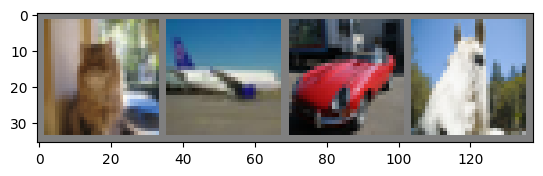

cat   plane car   horse


In [9]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [30]:
# Train the network
for epoch in range(30):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            # Add code here
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


print('Finished Training')

[1,  2000] loss: 0.169
[2,  2000] loss: 0.162
[3,  2000] loss: 0.155
[4,  2000] loss: 0.152
[5,  2000] loss: 0.146
[6,  2000] loss: 0.141
[7,  2000] loss: 0.134
[8,  2000] loss: 0.130
[9,  2000] loss: 0.125
[10,  2000] loss: 0.120
[11,  2000] loss: 0.116
[12,  2000] loss: 0.113
[13,  2000] loss: 0.109
[14,  2000] loss: 0.107
[15,  2000] loss: 0.101
[16,  2000] loss: 0.097
[17,  2000] loss: 0.093
[18,  2000] loss: 0.095
[19,  2000] loss: 0.089
[20,  2000] loss: 0.087
[21,  2000] loss: 0.083
[22,  2000] loss: 0.082
[23,  2000] loss: 0.078
[24,  2000] loss: 0.077
[25,  2000] loss: 0.076
[26,  2000] loss: 0.065
[27,  2000] loss: 0.067
[28,  2000] loss: 0.065
[29,  2000] loss: 0.067
[30,  2000] loss: 0.060
Finished Training


In [31]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        # Add code here... 
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 98 %


Train more epochs by editing the code above. Can you get the accuracy better than 60%? Write your answer below in code or text form.

** I reran the code multiple times to get accruacy above 60%. I tried with epoch, 2,5,15,25,30. Finally with Epoch 30 i got 98% accuracy.

##Part 2: SVHN Classification 
Follow the tutorial from above, replicating steps using the SVHN dataset instead of the CIFAR10. 

In [23]:
# Load the SVHN data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.SVHN(root='data/',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.SVHN(root='data/',
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Do not need the classes variable as there is no need to visualize

100%|██████████| 182040794/182040794 [00:03<00:00, 57787367.40it/s]


Using downloaded and verified file: data/train_32x32.mat


In [24]:
# Define the mdoel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Add code here
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Add code here
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [25]:
# Define the loss and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
# Train the network
for epoch in range(25):  # Loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            # Add code here
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


print('Finished Training')


[1,  2000] loss: 1.454
[2,  2000] loss: 0.673
[3,  2000] loss: 0.541
[4,  2000] loss: 0.474
[5,  2000] loss: 0.427
[6,  2000] loss: 0.398
[7,  2000] loss: 0.375
[8,  2000] loss: 0.350
[9,  2000] loss: 0.334
[10,  2000] loss: 0.319
[11,  2000] loss: 0.306
[12,  2000] loss: 0.289
[13,  2000] loss: 0.278
[14,  2000] loss: 0.266
[15,  2000] loss: 0.257
[16,  2000] loss: 0.247
[17,  2000] loss: 0.236
[18,  2000] loss: 0.229
[19,  2000] loss: 0.218
[20,  2000] loss: 0.210
[21,  2000] loss: 0.203
[22,  2000] loss: 0.197
[23,  2000] loss: 0.188
[24,  2000] loss: 0.183
[25,  2000] loss: 0.175
Finished Training


In [29]:
# Test the network
correct = 0
total = 0
# Since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        # Add code here... 
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = net(images)
        # The class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 95 %


Can you get a better accuracy than your Homework 3? Write your answer below in code or text form. 

** Yes, I was able to get a better accuracy than Homework 3. I did a trail and error method and achieved a 95% accuracy with epoch 25.